# F1 Telemetry Analysis

### Import Libraries and Enable Cache

In [38]:
import pandas as pd
import matplotlib.pyplot as plt  
import fastf1
from fastf1 import plotting
fastf1.Cache.enable_cache('cache')  #So data doesn't redownload every run


### Load Data

In [39]:
#2025 British Gran prix
session = fastf1.get_session(2025, 'SilverStone', 'Race')
session.load(telemetry=True, laps=True, weather=False)

core           INFO 	Loading data for British Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '27', '44', '1', '10', '18', '23', '14', '63', '87', '55', '31', '16', '22', '12', '6', '5', '30', '43']


### Select Drivers and Laps

In [40]:
#Hamilton 
#Fastest Lap
hamilton_lap = session.laps.pick_drivers("HAM").pick_fastest()
hamilton_lap["LapTime"]
#hamilton_lap["LapTime(s)"] = hamilton_lap["LapTime"].total_seconds() #convert to seconds


Timedelta('0 days 00:01:30.016000')

In [41]:
#Hulkenberg
#Fastest Lap
hulkenberg_lap = session.laps.pick_drivers("HUL").pick_fastest()
hulkenberg_lap["LapTime"]
#hulkenberg_lap["LapTime(s)"] = hulkenberg_lap["LapTime"].total_seconds() #convert to seconds

Timedelta('0 days 00:01:30.933000')

In [42]:
#Telemetry
hamilton_telemetry = session.laps.pick_drivers("HAM").pick_fastest().get_car_data().add_distance()
print(hamilton_telemetry)

                       Date      RPM  Speed  nGear  Throttle  Brake  DRS  \
0   2025-07-06 15:35:42.353  11709.0  258.0      6      99.0  False    0   
1   2025-07-06 15:35:42.553  10589.0  262.0      6      99.0  False    0   
2   2025-07-06 15:35:42.753  10741.0  265.0      7      99.0  False    0   
3   2025-07-06 15:35:42.993  10783.0  268.0      7      99.0  False    0   
4   2025-07-06 15:35:43.393  11044.0  275.0      7     100.0  False    0   
..                      ...      ...    ...    ...       ...    ...  ...   
331 2025-07-06 15:37:11.114  10882.0  236.0      6     100.0  False    0   
332 2025-07-06 15:37:11.394  11193.0  239.0      6      99.0  False    0   
333 2025-07-06 15:37:11.634  11324.0  246.0      6     100.0  False    0   
334 2025-07-06 15:37:11.914  11528.0  250.0      6     100.0  False    0   
335 2025-07-06 15:37:12.074  11528.0  255.0      6     100.0  False    0   

    Source                   Time            SessionTime     Distance  
0      car 0 da

In [43]:
hulkenberg_telemetry = session.laps.pick_drivers("HUL").pick_fastest().get_car_data().add_distance()
print(hulkenberg_telemetry)

                       Date      RPM  Speed  nGear  Throttle  Brake  DRS  \
0   2025-07-06 15:38:37.794  11865.0  259.0      6     100.0  False    0   
1   2025-07-06 15:38:38.274  11768.0  265.0      6     100.0  False    0   
2   2025-07-06 15:38:38.554  10865.0  269.0      7     100.0  False    0   
3   2025-07-06 15:38:38.714  10929.0  272.0      7     100.0  False    0   
4   2025-07-06 15:38:38.994  11066.0  276.0      7     100.0  False    0   
..                      ...      ...    ...    ...       ...    ...  ...   
330 2025-07-06 15:40:07.793  11159.0  240.0      6     100.0  False    0   
331 2025-07-06 15:40:07.953  11314.0  244.0      6     100.0  False    0   
332 2025-07-06 15:40:08.193  11508.0  248.0      6     100.0  False    0   
333 2025-07-06 15:40:08.394  11630.0  250.0      6     100.0  False    0   
334 2025-07-06 15:40:08.594  11767.0  255.0      6     100.0  False    0   

    Source                   Time            SessionTime     Distance  
0      car 0 da

### Visualise Performance

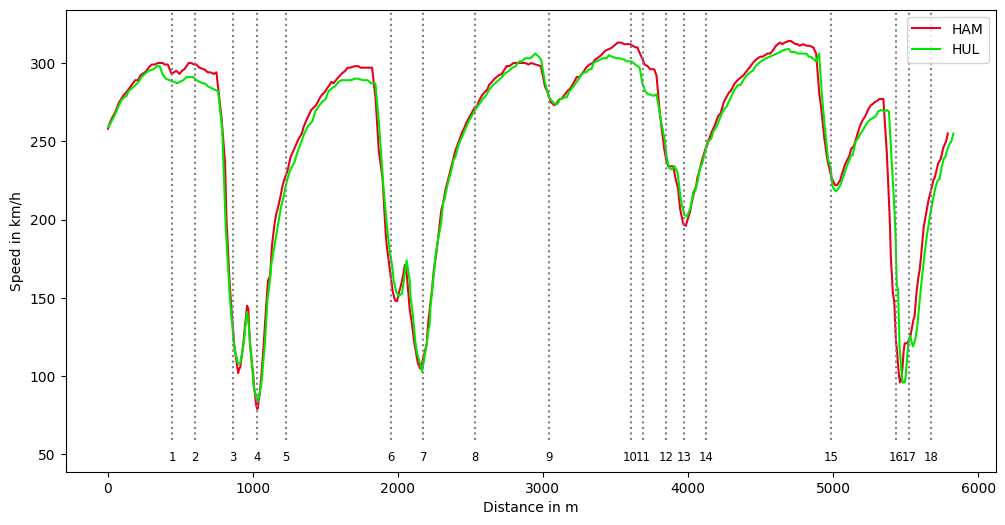

In [44]:
#Speed trace plot (speed vs distance)
circuit_info = session.get_circuit_info() #load circuit info

#plt.figure(figsize=(10,15))

teamha_color = fastf1.plotting.get_team_color(hamilton_lap['Team'],session=session)
teamhu_color = fastf1.plotting.get_team_color(hulkenberg_lap['Team'],session=session)

fig, ax = plt.subplots(figsize=(12, 6))


#Plot Hamilton
ax.plot(hamilton_telemetry['Distance'], hamilton_telemetry['Speed'],color=teamha_color, label=hamilton_lap['Driver'])

#Plot Hulkenberg
ax.plot(hulkenberg_telemetry['Distance'], hulkenberg_telemetry['Speed'],color=teamhu_color, label=hulkenberg_lap['Driver'])

# Compute combined min and max speed
v_min = min(hamilton_telemetry['Speed'].min(), hulkenberg_telemetry['Speed'].min())
v_max = max(hamilton_telemetry['Speed'].max(), hulkenberg_telemetry['Speed'].max())

# Draw vertical dotted lines (only once, scaled to both drivers)
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,linestyles='dotted', colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# adjust the y-axis limits to include the corner numbers
ax.set_ylim([v_min - 40, v_max + 20])

# Save the figure
plt.savefig("plots/ham_vs_hul")

plt.show()

Turns 3–4: Hülkenberg appears to have the stronger exits here, carrying more speed onto the following straight. This suggests better traction or earlier throttle application.

Turn 5–6: Hamilton carries higher minimum and exit speed, indicating stronger braking efficiency and corner rotation.

Turns 9–12: Hamilton consistently maintains higher speeds through this section. 

Turn 13: Hülkenberg again shows a better exit, which could point to stronger traction in slower corners.

Turns 14–16: Hamilton shows higher speeds through the sequence, likely gaining time with better stability on corner entry and exit.

Turns 16–17: The traces converge, making it unclear who had the advantage. Both drivers exit onto the straight at very similar speeds, meaning minimal lap-time difference here.

### Simulate Test and Validation Analysis
-Scanning the Telemtry to flag anomalies
Note: The below thresholds  were selected as simple heuristic cutoffs, chosen at deliberately extreme values to capture only unrealistic telemetry jumps, rather than typical driver behaviour


In [45]:

telemetry = hamilton_telemetry.copy()

# Compute differences between consecutive values
telemetry['Throttle_diff'] = telemetry['Throttle'].diff().abs()
telemetry['Brake_diff'] = telemetry['Brake'].diff().abs()
telemetry['Speed_diff'] = telemetry['Speed'].diff().abs()

# Define thresholds for "weird" jumps
anomalies_ham = telemetry[
    (telemetry['Throttle_diff'] > 50) |   # throttle jumped >50% instantly
    (telemetry['Brake_diff'] > 50) |      # brake jumped >50% instantly
    (telemetry['Speed_diff'] > 40)        # speed changed >40 km/h in one sample
]

# Show the anomalies
print(anomalies_ham[['Distance', 'Speed', 'Throttle', 'Brake']])


        Distance  Speed  Throttle  Brake
37    785.331667  265.0       9.0   True
110  1847.485278  277.0      10.0   True
126  2058.628611  169.0      11.0   True
216  3767.134444  296.0      45.0   True
273  4883.546944  306.0      18.0   True
300  5371.075000  242.0       3.0   True
301  5391.075000  200.0       1.0   True


In [46]:

telemetry = hulkenberg_telemetry.copy()

# Compute differences between consecutive values
telemetry['Throttle_diff'] = telemetry['Throttle'].diff().abs()
telemetry['Brake_diff'] = telemetry['Brake'].diff().abs()
telemetry['Speed_diff'] = telemetry['Speed'].diff().abs()

# Define thresholds for "weird" jumps
anomalies_hul = telemetry[
    (telemetry['Throttle_diff'] > 50) |   # throttle jumped >50% instantly
    (telemetry['Brake_diff'] > 50) |      # brake jumped >50% instantly
    (telemetry['Speed_diff'] > 40)        # speed changed >40 km/h in one sample
]

# Show the anomalies
print(anomalies_hul[['Distance', 'Speed', 'Throttle', 'Brake']])

        Distance  Speed  Throttle  Brake
32    789.897778  258.0       0.0   True
33    813.853333  196.0       0.0   True
51    972.120278  133.0       0.0   True
105  1871.696111  260.0       0.0   True
121  2082.501389  161.0       0.0   True
209  3667.101111  297.0      36.0  False
215  3782.723333  280.0       0.0   True
223  3928.501111  230.0       0.0   True
270  4904.046667  306.0       0.0   True
296  5385.217778  269.0       0.0   True
312  5530.884167  126.0       0.0  False


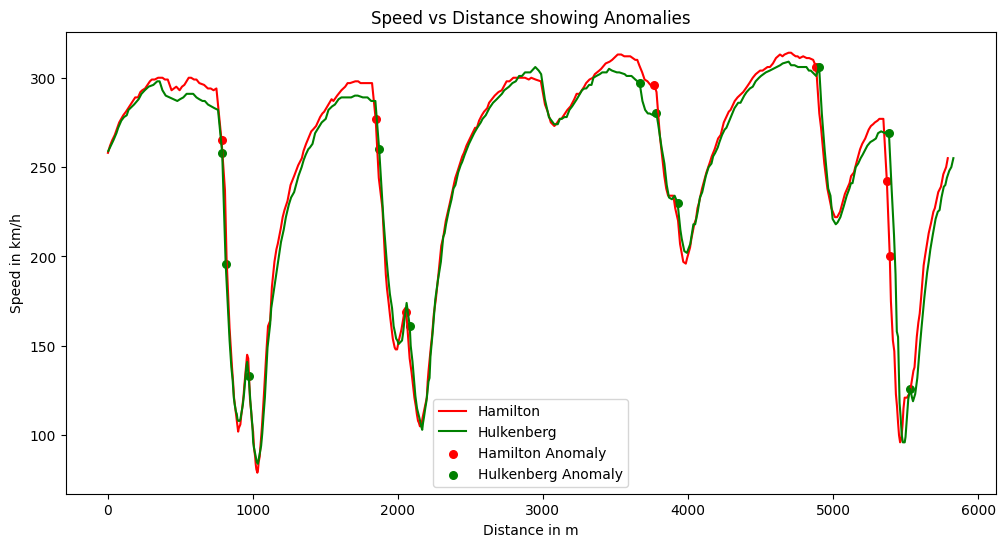

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the normal speed trace
ax.plot(hamilton_telemetry['Distance'], hamilton_telemetry['Speed'], color='red', label='Hamilton')

ax.plot(hulkenberg_telemetry['Distance'], hulkenberg_telemetry['Speed'], color='green', label='Hulkenberg')

# Highlight anomalies as red dots
ax.scatter(anomalies_ham['Distance'], anomalies_ham['Speed'], color='red', s=30, label='Hamilton Anomaly')
ax.scatter(anomalies_hul['Distance'], anomalies_hul['Speed'], color='green', s=30, label='Hulkenberg Anomaly')


ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()
plt.title("Speed vs Distance showing Anomalies")
plt.savefig("plots/ham_vs_hul_anomalies")
plt.show()


Where Hülkenberg has anomalies, Hamilton is faster (and vice versa).

Hülkenberg showed more anomalies than Hamilton - This suggests his lap was less consistent in terms of speed trace, potentially due to braking slightly earlier, traction issues, or less efficient throttle application.

Hamilton’s lap was smoother overall - With fewer anomalies, Hamilton’s lap profile shows more stable speed management, reflecting stronger execution or better car control.

### General Observations
1.  Both drivers’ speed traces are very similar — they follow almost the same line.
2.  Sharp drops in speed correspond to braking points. There are **5–6 major drops** visible, likely corners.
-The anomalies (dots) mostly appear at the **start of these drops**, which makes sense — sudden throttle → brake changes cause spikes in the derivative, so they show up as anomalies.
3. Where the lines overlap exactly, both drivers are likely equally efficient.
4. Anomalies can highlight track-specific strengths and weaknesses. For instance, Hülkenberg’s anomalies align with sections where Hamilton was faster, showing exactly where Hamilton had the edge.
5. Most anomalies occur in braking zones — could indicate **aggressive braking or data glitches**. * Analyzing these zones could tell engineers where a driver is pushing the car harder.



## Conclusion
The analysis of the speed traces and anomaly detection are consistent with the fact that Hamilton set the fastest lap. While some sections (such as Turns 3–4 and 13) showed Hulkenberg with stronger exits, Hamilton generally maintained higher speeds across longer stretches of the lap (notably around Turns 5–6, 9–12, and 14–16). The anomaly markers further highlighted moments where one driver’s performance dipped relative to the other, often coinciding with sections where Hamilton gained time. Taken together, these insights reinforce the earlier finding that Hamilton’s lap was quicker overall, rather than contradicting it.